### The University of Melbourne, School of Computing and Information Systems
# COMP30027 Machine Learning, 2022 Semester 1

## Assignment 1: Naive Bayes Leaner for Adult Database


**Student Name(s):** `Jiahao Chen`
<br>
**Student ID(s):** `1118749`



Marking will be applied on the four functions that are defined in this notebook, and to your responses to the questions at the end of this notebook.

## General info

<b>Due date</b>: Friday, 8 April 2022 7pm

<b>Submission method</b>: Canvas submission

<b>Submission materials</b>: This iPython notebook is a template which you will use for your Assignment 1 submission. You need to only submitted the completed copy of this iPython notebook.

<b>Late submissions</b>: -10% per day up to 5 days (both weekdays and weekends count). Submissions more than 5 days late will not be accepted (resul in a mark of 0).
<ul>
    <li>one day late, -1.0;</li>
    <li>two days late, -2.0;</li>
    <li>three days late, -3.0;</li>
    <li>four days late, -4.0;</li>
    <li>five days late, -5.0;</li>
</ul>

<b>Extensions</b>: Students who are demonstrably unable to submit a full solution in time due to medical reasons or other trauma, may apply for an extension.  In these cases, you should email <a href="mailto:ni.ding@unimelb.edu.au">Ni Ding</a> as soon as possible after those circumstances arise. If you attend a GP or other health care service as a result of illness, be sure to provide a Health Professional Report (HPR) form (get it from the Special Consideration section of the Student Portal), you will need this form to be filled out if your illness develops into something that later requires a Special Consideration application to be lodged. You should scan the HPR form and send it with the extension requests.

<b>Marks</b>: This assignment will be marked out of 20, and make up 20% of your overall mark for this subject.

<b>Materials</b>: Use Jupyter Notebook and Python page on Canvas for information on the basic setup required for this class, including an iPython notebook viewer and the python packages NLTK, Numpy, Scipy, Matplotlib, Scikit-Learn. You can use any Python built-in packages, but do not use any other 3rd party packages; if your iPython notebook doesn't run on the marker's machine, you will lose marks. <b> You should use Python 3</b>.  


<b>Evaluation</b>: Your iPython notebook should run end-to-end without any errors in a reasonable amount of time, and you must follow all instructions provided below, including specific implementation requirements and instructions for what needs to be printed (please avoid printing output we don't ask for). You should edit the sections below where requested, but leave the rest of the code as is. You should leave the output from running your code in the iPython notebook you submit, to assist with marking. The amount each section is worth is given in parenthesis after the instructions. 

You will be marked not only on the correctness of your methods, but also the quality and efficency of your code: in particular, you should be careful to use Python built-in functions and operators when appropriate and pick descriptive variable names that adhere to <a href="https://www.python.org/dev/peps/pep-0008/">Python style requirements</a>. If you think it might be unclear what you are doing, you should comment your code to help the marker make sense of it. We reserve the right to deduct up to 2 marks for unreadable or exessively inefficient code.

8 of the marks available for this Project will be assigned to whether the four specified Python functions work in a manner consistent with the materials from COMP30027. Any other implementation will not be directly assessed (except insofar as it is required to make these five functions work correctly).

12 of the marks will be assigned to your responses to the questions, in terms of both accuracy and insightfulness. We will be looking for evidence that you have an implementation that allows you to explore the problem, but also that you have thought deeply about the data and the behaviour of the Naive Bayes classifier.

<b>Updates</b>: Any major changes to the assignment will be announced via Canvas. Minor changes and clarifications will be announced on the discussion board (ED -> Assignments -> A1); we recommend you check it regularly.

<b>Academic misconduct</b>: For most people, collaboration will form a natural part of the undertaking of this homework, and we encourge you to discuss it in general terms with other students. However, this ultimately is still an individual task, and so reuse of code or other instances of clear influence will be considered cheating. Please check the <a href="https://canvas.lms.unimelb.edu.au/courses/124196/modules#module_662096">CIS Academic Honesty training</a> for more information. We will be checking submissions for originality and will invoke the University’s <a href="http://academichonesty.unimelb.edu.au/policy.html">Academic Misconduct policy</a> where inappropriate levels of collusion or plagiarism are deemed to have taken place.

**IMPORTANT**

Please carefully read and fill out the <b>Authorship Declaration</b> form at the bottom of the page. Failure to fill out this form results in the following deductions: 
<UL TYPE=”square”>
<LI>missing Authorship Declaration at the bottom of the page, -5.0
<LI>incomplete or unsigned Authorship Declaration at the bottom of the page, -3.0
</UL>
**NOTE: COMPLETE AND SUBMIT THIS FILE. YOU SHOULD IMPLEMENT FOUR FUNCTIONS AND INCLUDE YOUR ANSWERS TO THE QUESTIONS IN THIS FILE ONLY. NO OTHER SUBMISSION IS REQUIRED.**

**Keep your code clean. Adding proper comments to your code is MANDATORY.**

## Part 1: Base code [8 marks]

Instructions
1. Do **not** shuffle the data set
2. Treat the attributes as they are(e.g., do **not** convert numeric attributes to categorical or categorical to numeric). Implement a Naive Bayes classifier with appropriate likelihood function for each attribute.
3. You should implement the Naive Bayes classifier from scratch. Do **not** use existing implementations/learning algorithms.
4. You CANNOT have more than one train or predict function. Both continuous numeric attributes and categorical ones should be trained in one `train()` function, similarly for the `predict()`.  
5. Apart from the instructions in point 3, you may use libraries to help you with data reading, representation, maths or evaluation
6. Ensure that all and only required information is printed, as indicated in the final three code cells. Failure to adhere to print the required information will result in **[-1 mark]** per case. *(We don't mind details like you print a list or several numbers -- just make sure the information is displayed so that it's easily accessible)
7. You may change the prototypes of these functions, and you may write other functions, according to your requirements. We would appreciate it if the required functions were prominent/easy to find. 
8. You should add adequate comments to make your code easily comprehendible.*

In [1]:
import math
import numpy as np
import pandas as pd
from collections import Counter

import matplotlib.pyplot as plt
%matplotlib inline

### Stage 1: Preprocess

In [2]:
# Global Variables

# Representing two class labels
class1 = " <=50K"
class2 = " >50K"

# Define the proportion of training set
train_prop = 0.9

# Define the path of data file
file_path = "dataset/adult.csv"

# Separate nominal and numeric features
numeric_features = ['age', 'education num', 'hours per week']
nominal_features = ['work class', 'education', 'marital status', 'occupation', 'relationship', 'race', 'sex', 'native country (region)']

# Read raw data and force all numeric features to have type of numeric
data = pd.read_csv(file_path)
data[numeric_features] = data[numeric_features].apply(pd.to_numeric, errors='coerce')

In [3]:
# This function should prepare the data by reading it from a file 
# and converting it into a useful format for training and testing
# and implement 90-10 splitting as specified in the project description.
def preprocess(data):
    
    # Calculate the size of the training dataset
    train_size = int(data.shape[0] * train_prop)
    
    # Implement splitting
    X_train, X_test = data.iloc[:train_size, :-1], data.iloc[train_size:, :-1]
    y_train, y_test = data.iloc[:train_size, -1:], data.iloc[train_size:, -1:]
    
    return X_train, X_test, y_train, y_test

In [4]:
# This function splits nominal and numeric features.
def nominal_numeric_split(data):
    nominal = []
    numeric = []
    for i in range(data.shape[1]):
        if (data.dtypes[i] == "int64"):
            numeric.append(data.columns[i])
        else:
            nominal.append(data.columns[i])
    return nominal, numeric

### Stage 2: Build Naive Bayes Model

__1. Prior Probabilities__

In [5]:
# This function computes the log based prior probability of the given class lable.
def prior(y_train, label):
    num = y_train.loc[y_train["label"] == label].shape[0]
    total = y_train.shape[0]
    return np.log(num / total)

__2. Nominal features: Identify all the conditional probabilities P(Xi|cj)__

In [6]:
# This function computes all log based P(Xi|cj) and store them.
def cond_prob_table(X_train, y_train, nominal_features):
    tables = {}
    alpha = 1
    for feature in nominal_features:
        # Extract distinct values of the feature
        distinct_values = set(X_train[feature])
        
        # Extract colunm of the feature with label of class1 and class2
        class1_values = X_train[feature].loc[y_train["label"] == class1]
        class2_values = X_train[feature].loc[y_train["label"] == class2]
        
        # Count occurances of values
        class1_counter = Counter(class1_values)
        class2_counter = Counter(class2_values)

        # Total number of class1 and class2
        class1_total = len(class1_values)
        class2_total = len(class2_values)
        
        class1_probs = []
        class2_probs = []
        
        # Compute P(Xi|c1) and P(Xi|c2) using Laplace smoothing
        for value in distinct_values:
            # Cardinality of feature
            d = len(distinct_values)
            
            class1_prob = np.log((class1_counter[value] + alpha) / (class1_total + alpha * d))
            class1_probs.append(class1_prob)

            class2_prob = np.log((class2_counter[value] + alpha) / (class2_total + alpha * d))
            class2_probs.append(class2_prob)
        
        # Store results for the feature
        tables[feature] = pd.DataFrame([class1_probs, class2_probs], columns=distinct_values, index=["class1", "class2"])
    
    return tables

__3. Numeric features: Fit a Gaussian distribution to the conditional probability P(Xi|cj)__

In [7]:
# This function computes means and standard deviations of all class labels 
# based on all numeric features and store them.
def mean_std_table(X_train, y_train, numeric_features):
    class1_means = []
    class1_stds = []
    class2_means = []
    class2_stds = []
    # Compute means and stds for each feature
    for feature in numeric_features:
        class1_mean, class1_std = mean_std(X_train, y_train, class1, feature)
        class2_mean, class2_std = mean_std(X_train, y_train, class2, feature)
        class1_means.append(class1_mean)
        class1_stds.append(class1_std)
        class2_means.append(class2_mean)
        class2_stds.append(class2_std)
    # Store into a new table
    data = [class1_means, class1_stds, class2_means, class2_stds]
    return pd.DataFrame(data, columns=numeric_features, index=["class1_mean", "class1_std", "class2_mean", "class2_std"])


# This function computes mean and standard deviation of the given class label based on a numeric feature.
def mean_std(X_train, y_train, label, feature):
    results = X_train[feature].loc[y_train["label"] == label]
    return np.nanmean(results), np.nanstd(results)

__4. Train the Naive Bayes Model__

In [8]:
# This function should calculate prior probabilities and likelihoods (conditional probabilities) 
# from the training data and using to build a naive Bayes model.
def train(X_train, y_train, nominal_features, numeric_features):
    
    # Prior probablities
    prior_prob = pd.DataFrame([prior(y_train, class1), prior(y_train, class2)], columns=["prior"], index=["class1", "class2"])
    
    # Identify all the conditional probabilities for nominal features
    nominal_prob = cond_prob_table(X_train, y_train, nominal_features)
    
    # Fit a gaussian distribution for numeric features
    numeric_stat = mean_std_table(X_train, y_train, numeric_features)
    
    return prior_prob, nominal_prob, numeric_stat

### Stage 3: Prediction

__Sum of P(Xi|cj) is seqarated into two parts because we have both nominal and numeric features__ 

In [9]:
# This function sums the log based likelihoods of all nominal features.
def sum_prob_nominal(instance, nominal_features, nominal_prob):
    class1_prob = 0;
    class2_prob = 0;
    
    for feature in nominal_features:
        value = instance[feature]
        # If the value is not encountered in the training set, ignore it
        if value in nominal_prob[feature].columns:
            class1_prob += nominal_prob[feature][value]['class1']
            class2_prob += nominal_prob[feature][value]['class2']
        
    return class1_prob, class2_prob

In [10]:
# This function sums the log based pdf of all numeric features.
def sum_prob_numeric(instance, numeric_features, numeric_stat):
    class1_prob = 0;
    class2_prob = 0;
    
    # Compute the log based pdf of each feature
    for feature in numeric_features:
        value = instance[feature]
        if (not np.isnan(value)):
            class1_pdf = pdf_gaussian(value, numeric_stat[feature]['class1_mean'], numeric_stat[feature]['class1_std'])
            if (class1_pdf != 0):
                class1_prob += np.log(class1_pdf)

            class2_pdf = pdf_gaussian(value, numeric_stat[feature]['class2_mean'], numeric_stat[feature]['class2_std'])
            if (class2_pdf != 0):
                class2_prob += np.log(class2_pdf)
                
    return class1_prob, class2_prob


# This function computes pdf of the given value based on gaussian distribution.
def pdf_gaussian(x, mean, std):
    return ( 1 / (std * math.sqrt(2 * math.pi)) ) * math.pow( math.e, -0.5 * math.pow((x - mean) / std, 2) )

In [11]:
# This function should predict classes for new items in the testing data.
def predict(X_test, nominal_features, nominal_prob, numeric_features, numeric_stat, prior_prob):
    predicts = []
    class1_posterior = []
    class2_posterior = []
    test_size = X_test.shape[0]
    
    # Perform predictions for test instances
    for i in range(test_size):
        instance = X_test.iloc[i]
        class1_nominal_prob, class2_nominal_prob = sum_prob_nominal(instance, nominal_features, nominal_prob)
        class1_numeric_prob, class2_numeric_prob = sum_prob_numeric(instance, numeric_features, numeric_stat)
        
        # Compute log based posterior probability for two class labels
        class1_post_prob = prior_prob['prior']['class1'] + class1_nominal_prob + class1_numeric_prob
        class2_post_prob = prior_prob['prior']['class2'] + class2_nominal_prob + class2_numeric_prob
        
        class1_posterior.append(class1_post_prob)
        class2_posterior.append(class2_post_prob)
        
        # Choose the label with max probability as the predict result
        if (class1_post_prob > class2_post_prob):
            predicts.append(class1)
        else:
            predicts.append(class2)
       
    return predicts, class1_posterior, class2_posterior

### Stage 4: Evaluation

In [12]:
# This function should evaluate the prediction performance by comparing your model’s class outputs to ground
# truth labels, return and output accuracy, confusion matrix and F1 score.
def evaluate(predicts, y_test):
    TP = 0
    FP = 0
    FN = 0
    TN = 0
    test_size = y_test.shape[0]
    
    # Count TP, FP, FN, TN
    for i in range(test_size):
        if (predicts[i] == class1 and y_test["label"].iloc[i] == class1):
            TP += 1
        elif (predicts[i] == class1 and y_test["label"].iloc[i] == class2):
            FP += 1
        elif (predicts[i] == class2 and y_test["label"].iloc[i] == class1):
            FN += 1
        else:
            TN += 1
    
    # Compute parameters
    accuracy = (TP + TN) / (TP + FP + FN + TN)
    precision = 0
    recall = 0
    f1 = 0
    if (TP != 0):
        precision = TP / (TP + FP)
        recall = TP / (TP + FN)
        f1 = 2 * precision * recall / (precision + recall)
    
    # Generate confusion matrix
    confusion = [[TP, FN], [FP, TN]]
    
    return accuracy, confusion, f1

In [13]:
# This function visualises the confusion matrix.
def print_confusion_matrix(matrix):
    print("Confusion Matrix: ")
    display(pd.DataFrame(matrix, columns=["Positive", "Negative"], index=["Positive", "Negative"]))

In [14]:
# This cell should act as your "main" function where you call the above functions 
# on the full ADULT data set, and print the evaluation score. [0.33 marks]


# First, read in the data and apply your NB model to the OBJECTIVITY data
X_train, X_test, y_train, y_test = preprocess(data)
prior_prob, nominal_prob, numeric_stat = train(X_train, y_train, nominal_features, numeric_features)
predicts, posterior1, posterior2 = predict(X_test, nominal_features, nominal_prob, numeric_features, numeric_stat, prior_prob)


# Second, print the full evaluation results from the evaluate() function
accuracy, confusion_matrix, f1_score = evaluate(predicts, y_test)
print_confusion_matrix(confusion_matrix)
print(f"Accuracy: {round(accuracy * 100, 2)}%")
print(f"F1 Score: {round(f1_score * 100, 2)}%\n\n")


# Third, print data statistics and model predictions, as instructed below 
# N is the total number of instances, F the total number of attributes, L the total number of labels
# The "class probabilities" may be unnormalized
# The "predicted class ID" must be in range (0, L)

print("Attribute vectors of instances [0, 1, 2]: ")
display(data.iloc[0:3, :-1])

print("\nNumber of instances (N): ", len(data))
print("Number of attributes (F): ", len(data.columns) - 1)
print("Number of labels (L): ", len(set(data["label"])))

print("\n\nPredicted class probabilities for instance N-3: ", f"<=50K: {round(posterior1[-3], 2)} | >50K: {round(posterior2[-3], 2)}")
print("Predicted class ID for instance N-3:", predicts[-3])
print("\nPredicted class probabilities for instance N-2: ", f"<=50K: {round(posterior1[-2], 2)} | >50K: {round(posterior2[-2], 2)}")
print("Predicted class ID for instance N-2:", predicts[-2])
print("\nPredicted class probabilities for instance N-1: ", f"<=50K: {round(posterior1[-1], 2)} | >50K: {round(posterior2[-1], 2)}")
print("Predicted class ID for instance N-1:", predicts[-1])

Confusion Matrix: 


,Positive,Negative
Positive,69,8
Negative,6,17


Accuracy: 86.0%
F1 Score: 90.79%


Attribute vectors of instances [0, 1, 2]: 


,age,work class,education,education num,marital status,occupation,relationship,race,sex,hours per week,native country (region)
0,68,?,1st-4th,2,Divorced,?,Not-in-family,White,Female,20,United-States
1,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States
2,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States



Number of instances (N):  1000
Number of attributes (F):  11
Number of labels (L):  2


Predicted class probabilities for instance N-3:  <=50K: -20.77 | >50K: -19.76
Predicted class ID for instance N-3:  >50K

Predicted class probabilities for instance N-2:  <=50K: -25.31 | >50K: -22.8
Predicted class ID for instance N-2:  >50K

Predicted class probabilities for instance N-1:  <=50K: -16.93 | >50K: -16.91
Predicted class ID for instance N-1:  >50K


## Part 2: Conceptual questions [8 marks for groups of 1] / [16 marks for groups of 2]


If you are in a group of 1, you should respond to Q1 and Q2.

If you are in a group of 2, you should respond to Q1, Q2, Q3 and Q4.

A response to a question should take about 100–250 words. You may need to develope codes or functions to help respond to the question here. 

#### NOTE: We strongly recommend <u>including figures or tables, etc.</u> to support your responses. The figures and tables inserted in Markdown cells must be reproducable by your code.

### Q1 [4 marks]
<u>Sensitivity</u> and <u>specificity</u> are two model evaluation metrics.  A good model should have both sensitivity and specificity high. Use the $2 \times 2$ confusion matrix returned by `evaluate()` to calculate the sensitivity and specificity. Do you see a difference between them? If so, what causes this difference? Provide suggestions to improve the model performance. 

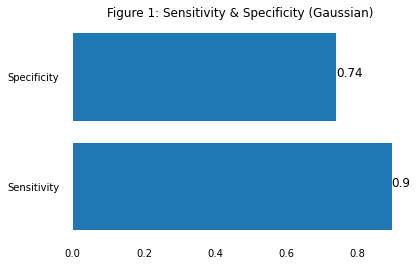

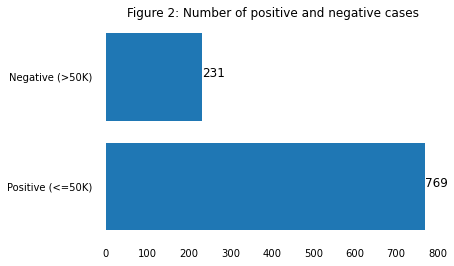

In [15]:
# Compute sensitivity and specificity using the confuison matrix
TP = confusion_matrix[0][0]
FP = confusion_matrix[1][0]
FN = confusion_matrix[0][1]
TN = confusion_matrix[1][1]

sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

# Plot the bar chart
fig, ax = plt.subplots(figsize =(6, 4))
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

xlabel = ["Sensitivity", "Specificity"]
ylabel = [sensitivity, specificity]
ax.barh(xlabel, ylabel)

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width(), i.get_y()+0.4, str(round((i.get_width()), 2)), fontsize=12)

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
plt.title("Figure 1: Sensitivity & Specificity (Gaussian)", fontsize=12)
plt.show()


# Plot bar chart of positive and negative cases
fig, ax = plt.subplots(figsize =(6, 4))
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

xlabel = ["Positive (<=50K)", "Negative (>50K)"]
ylabel = [data["label"].value_counts()[0], data["label"].value_counts()[1]]
ax.barh(xlabel, ylabel)

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width(), i.get_y()+0.4, str(round((i.get_width()), 2)), fontsize=12)

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
plt.title("Figure 2: Number of positive and negative cases", fontsize=12)
plt.show()

By definition, sensitivity is the proportion of true positive cases in the model. As figure 1 depicts, the model has a higher sensitivity, which means it is better at predicting positive instances rather than negative ones. 

As figure 2 shows, the distribution of positive and negative cases is hugely unbalanced. The number of positive cases is over 3 times of the negative ones. In such case, the model tends to predict more positive cases because the prior probability of positive label is much higher than negative label.  As a result, the number of TP and FP is relatively larger than TN and FN so that the proportion of TP among all positive cases (TP + FN) is greater.

To improve the model performance, one of the methods is to make positive cases and negative cases distribute evenly when sampling the data so that the prior probability will not have a huge impact on predictions. Besides, stratification or vertical sampling can be applied so that training data and test data can both have the same class distribution as the whole dataset. 

On the other hand, Laplace smoothing is applied in the model and the choice of 𝛼 can affect the performance. In addition, if a feature value in test set is not encountered in training set, I choose to ignore it because there are many other nominal features. But there can be better ways handling these missing values to improve the performance.

### Q2 [4 marks]
You can adopt different methods for training and/or testing, which will produce different results in model evaluation. 

(a) Instead of Gaussian, <u>implement KDE</u> for  $P(X_i|c_j)$ for numeric attributes $X_i$. Compare the evaluation results with Gaussian. Which one do you think is more suitable to model $P(X_i|c_j)$, Gaussian or KDE? Observe all numeric attributes and justify your answer.

You can choose an arbitrary value for kernel bandwidth $\sigma$ for KDE, but a value between 3 and 15 is recommended. You should write code to implement KDE, not call an existing function/method such as `KernelDensity` from `scikit-learn`.

(b) Implement <u>10-fold and 2-fold cross-validations</u>.  
	Observe the evaluation results in each fold and the average accuracy, recall and specificity over all folds. 
	Comment on what is the effect by changing the values of $m$ in $m$-fold cross validation. (You can choose either Gaussian or KDE Naive Bayes.)

__Q2(a): Implement KDE on numeric features__

In [16]:
# Prior probablities and P(Xi|cj) for nominal features are the same as above.
# We only need to rebuild the model for numeric features using KDE.

# This function trains the Naive Bayes model using KDE.
def train_kde(X_train, X_test, y_train, nominal_features, numeric_features, bandwidth):
    # Prior probablities
    prior_prob = pd.DataFrame([prior(y_train, class1), prior(y_train, class2)], columns=["prior"], index=["class1", "class2"])
    
    # Identify all the conditional probabilities for nominal features
    nominal_prob = cond_prob_table(X_train, y_train, nominal_features)
    
    # Implement KDE for numeric features
    numeric_stat_kde = kde_table(X_train, X_test, y_train, numeric_features, bandwidth)
    
    return prior_prob, nominal_prob, numeric_stat_kde


# This function computes probabilities of test instances using KDE and store them.
def kde_table(X_train, X_test, y_train, numeric_features, bandwidth):
    data = []
    for feature in numeric_features:
        # Extract colunm of the feature with label of class1 and class2
        class1_values = X_train[feature].loc[y_train["label"] == class1]
        class2_values = X_train[feature].loc[y_train["label"] == class2]
        
        class1_probs = []
        class2_probs = []
        
        # Compute KDE
        for x in X_test[feature]:
            if (not np.isnan(x)):
                class1_probs.append(pdf_kde(x, class1_values, bandwidth))
                class2_probs.append(pdf_kde(x, class2_values, bandwidth))
            else:
                class1_probs.append(0)
                class2_probs.append(0)
        
        data.append(class1_probs)
        data.append(class2_probs)
        
    return pd.DataFrame(data, index=index_kde(numeric_features))


# This function computes the log based pdf using KDE.
def pdf_kde(x, values, bandwidth):
    sum_prob = 0
    for xi in values:
        if (not np.isnan(xi)):
            sum_prob += pdf_gaussian(x, xi, bandwidth)

    return np.log(sum_prob / len(values))


# This function generates index of the KDE table based on all numeric features.
def index_kde(numeric_features):
    res = []
    for feature in numeric_features:
        res.append("class1_" + feature)
        res.append("class2_" + feature)
    return res

In [17]:
# This function predicts based on KDE.
def predict_kde(X_test, nominal_features, nominal_prob, numeric_features, numeric_stat_kde, prior_prob):
    predicts = []
    test_size = X_test.shape[0]
    
    # Perform predictions for test instances
    for i in range(test_size):
        instance = X_test.iloc[i]
        class1_nominal_prob, class2_nominal_prob = sum_prob_nominal(instance, nominal_features, nominal_prob)
        class1_numeric_prob, class2_numeric_prob = sum_prob_numeric_kde(i, numeric_features, numeric_stat_kde)
        
        # Compute log based posterior probability for two class labels
        class1_post_prob = prior_prob['prior']['class1'] + class1_nominal_prob + class1_numeric_prob
        class2_post_prob = prior_prob['prior']['class2'] + class2_nominal_prob + class2_numeric_prob
        
        # Choose the label with max probability as the predict result
        if (class1_post_prob > class2_post_prob):
            predicts.append(class1)
        else:
            predicts.append(class2)
            
    return predicts


# This function sums the log based pdf of all numeric features using KDE.
def sum_prob_numeric_kde(instance, numeric_features, numeric_stat_kde):
    class1_prob = 0
    class2_prob = 0
    
    for feature in numeric_features:
        class1_prob += numeric_stat_kde[instance]["class1_" + feature]
        class2_prob += numeric_stat_kde[instance]["class2_" + feature]
    
    return class1_prob, class2_prob

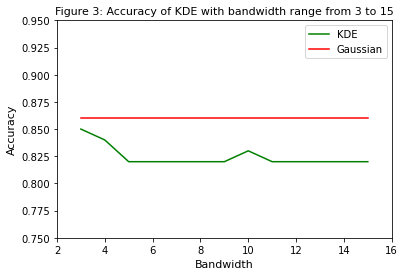

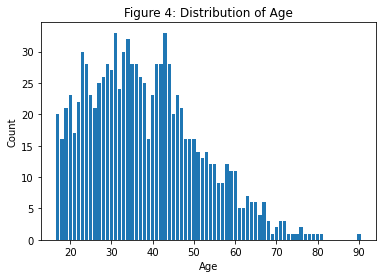

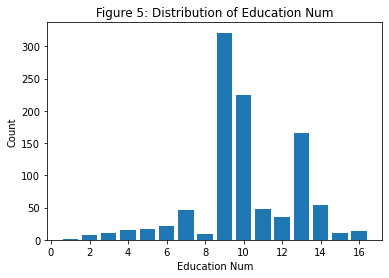

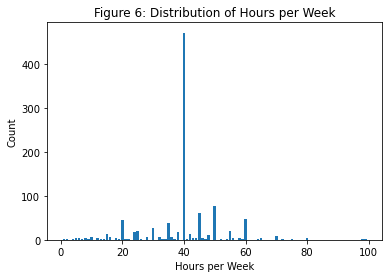

In [18]:
# This function encapsulates all steps of implementing Naive Bayes using KDE to help generate results with different bandwidths.
def kde_nb(bandwidth, X_train, X_test, y_train, y_test, nominal_features, numeric_features):
    prior_prob, nominal_prob, numeric_stat_kde = train_kde(X_train, X_test, y_train, nominal_features, numeric_features, bandwidth)
    predicts_kde = predict_kde(X_test, nominal_features, nominal_prob, numeric_features, numeric_stat_kde, prior_prob)
    return evaluate(predicts_kde, y_test)


# Accuracy of KDE with bandwidth range from 3 to 15
accuracy_gaussian = []
accuracy_kde = []
for i in range(3, 16):
    accuracy_gaussian.append(accuracy)
    acc, conf, f1_score = kde_nb(i, X_train, X_test, y_train, y_test, nominal_features, numeric_features)
    accuracy_kde.append(acc)


# Plot the chart
plt.title('Figure 3: Accuracy of KDE with bandwidth range from 3 to 15', fontsize=11)
plt.xlim(xmax = 16, xmin = 2)
plt.ylim(ymax = 0.95, ymin = 0.75)
plt.plot(range(3, 16), accuracy_kde, color="green", label="KDE")
plt.plot(range(3, 16), accuracy_gaussian, color="red", label="Gaussian")
plt.xlabel('Bandwidth', fontsize=11)
plt.ylabel('Accuracy', fontsize=11)
plt.legend()
plt.show()


# Distribution of age
age_dict = Counter(data[numeric_features[0]])
ages = list(age_dict.keys())
cnt = list(age_dict.values())
plt.title('Figure 4: Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.bar(ages, cnt, linewidth=0)
plt.show()


# Distribution of education num
edu_dict = Counter(data[numeric_features[1]])
edu = list(edu_dict.keys())
cnt = list(edu_dict.values())
plt.title('Figure 5: Distribution of Education Num')
plt.xlabel('Education Num')
plt.ylabel('Count')
plt.bar(edu, cnt)
plt.show()


# Distribution of hours per week
hpw_dict = Counter(data[numeric_features[2]])
hpw = list(hpw_dict.keys())
cnt = list(hpw_dict.values())
plt.title('Figure 6: Distribution of Hours per Week')
plt.xlabel('Hours per Week')
plt.ylabel('Count')
plt.bar(hpw, cnt)
plt.show()

As figure 3 shows, accuracy of using KDE with bandwidth range from 3 to 15 is always lower than the original one using Gaussian. The 𝛼 for Laplace smoothing is set to 1 in both implementations.  It seems that Gaussian is a better choice in this case. Gaussian normally works well if the data follows a Gaussian distribution. Figure 4, 5, 6 plot distributions of all numeric attributes. 

For age, the distribution skews to right so that it does not follows a Gaussian distribution. For a large dataset, it may be reasonable to assume age follows a Gaussian distribution based on central limit theorem. 

For education years, it can be approximately regarded as a Gaussian distribution, but KDE can be feasible as well.

For work hours per week, the distribution follows a Gaussian distribution with very low variance since most people works 8 hours per day.

As a result, two of all numeric attributes can be assumed to follow a Gaussian distribution. Therefore, it is reasonable that Gaussian performs slightly better than KDE for this dataset.

__Q2(b): Implement 10-fold and 2-fold cross-validations__

In [19]:
# This functions changes the return value of the original evaluate function 
# to help observe accuracy, recall and specificity of different k-fold validations.
def evaluate_k_fold(predicts, y_test):
    TP = 0
    FP = 0
    FN = 0
    TN = 0
    test_size = y_test.shape[0]
    
    for i in range(test_size):
        if (predicts[i] == class1 and y_test["label"].iloc[i] == class1):
            TP += 1
        elif (predicts[i] == class1 and y_test["label"].iloc[i] == class2):
            FP += 1
        elif (predicts[i] == class2 and y_test["label"].iloc[i] == class1):
            FN += 1
        else:
            TN += 1
    
    # Compute parameters
    accuracy = (TP + TN) / (TP + FP + FN + TN)
    recall = 0
    specificity = 0
    if (TP != 0):
        recall = TP / (TP + FN)
    if (TN != 0):
        specificity = TN / (TN + FP)
    
    return accuracy, recall, specificity

In [20]:
# This function encapsulates all steps of implementing Naive Bayes using Gaussian to help observing different k-fold.
def gaussian_nb_k_fold(X_train, X_test, y_train, y_test, nominal_features, numeric_features):
    prior_prob, nominal_prob, numeric_stat = train(X_train, y_train, nominal_features, numeric_features)
    predicts, posterior1, posterior2 = predict(X_test, nominal_features, nominal_prob, numeric_features, numeric_stat, prior_prob)
    return evaluate_k_fold(predicts, y_test)

# This function encapsulates all steps of implementing Naive Bayes using KDE to help help observing different k-fold.
def kde_nb_k_fold(bandwidth, X_train, X_test, y_train, y_test, nominal_features, numeric_features):
    prior_prob, nominal_prob, numeric_stat_kde = train_kde(X_train, X_test, y_train, nominal_features, numeric_features, bandwidth)
    predicts_kde = predict_kde(X_test, nominal_features, nominal_prob, numeric_features, numeric_stat_kde, prior_prob)
    return evaluate_k_fold(predicts_kde, y_test)

In [21]:
# This function performs k-fold cross validation on the dataset.
def k_fold(k, file_path):
  
    # Compute the size of each segment in k-fold
    fold_size = len(data) / k
    
    # Observe accuracy, recall and specificity
    accuracy_k = []
    recall_k = []
    specificity_k = []
    
    # Start k-fold cross validation
    for i in range(k):
        # Separate train and test segments
        test_fold = list( range(int(i * fold_size), int((i + 1) * fold_size)) )
        train_fold = data.index.drop(test_fold)
        
        # Split features and label
        X_train, X_test = data.iloc[train_fold, :-1], data.iloc[test_fold, :-1]
        y_train, y_test = data.iloc[train_fold, -1:], data.iloc[test_fold, -1:]
        
        # Use Gaussian or KDE
        accuracy, recall, specificity = gaussian_nb_k_fold(X_train, X_test, y_train, y_test, nominal_features, numeric_features)
        # accuracy, recall, specificity = kde_nb_k_fold(8, X_train, X_test, y_train, y_test, nominal_features, numeric_features)
        
        accuracy_k.append(accuracy)
        recall_k.append(recall)
        specificity_k.append(specificity)
        
    return accuracy_k, recall_k, specificity_k

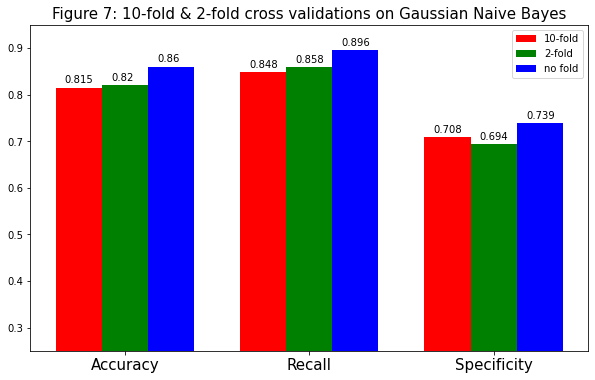

In [22]:
# Perform 10-fold and 2-fold cross validations on the dataset
accuracy_10, recall_10, specificity_10 = k_fold(10, file_path)
accuracy_2, recall_2, specificity_2 = k_fold(2, file_path)

stat_10 = [np.mean(accuracy_10), np.mean(recall_10), np.mean(specificity_10)]
stat_2 = [np.mean(accuracy_2), np.mean(recall_2), np.mean(specificity_2)]
stat = [accuracy, sensitivity, specificity]

# Plot the evaluation results
barWidth = 0.25
fig = plt.subplots(figsize =(10, 6))

br1 = np.arange(len(stat_10))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

bars1 = plt.bar(br1, stat_10, color='r', width=barWidth, label='10-fold')
bars2 = plt.bar(br2, stat_2, color='g', width=barWidth, label='2-fold')
bars3 = plt.bar(br3, stat, color='b', width=barWidth, label='no fold')

for b in bars1:
    y = round(b.get_height(), 3)
    plt.text(b.get_x()+0.05, y+0.01, y)

for b in bars2:
    y = round(b.get_height(), 3)
    plt.text(b.get_x()+0.05, y+0.01, y)

for b in bars3:
    y = round(b.get_height(), 3)
    plt.text(b.get_x()+0.05, y+0.01, y)

plt.ylim(ymax = 0.95, ymin = 0.25)
plt.xticks([r + barWidth for r in range(len(stat_10))], ['Accuracy', 'Recall', 'Specificity'], fontsize=15)
plt.title("Figure 7: 10-fold & 2-fold cross validations on Gaussian Naive Bayes", fontsize=15)
plt.legend()
plt.show()

As figure 7 depicts, 10-fold has lower accuracy and recall than 2-fold while its specificity is slightly higher. Meanwhile, 10-fold and 2-fold are both lower than the original 90-10 splitting for all evaluation metrics, which indicates that the original model may not be general to other instances.

As m gets larger, the performance of the model can be measured more accurately with less bias. In the meantime, the variance of metrics gets larger, and the running time becomes longer because there are more training data for each fold. Leave-one-out is the ideal way when m equals the number of instances, which costs huge amount of time in practice. 

In this case, 2-fold seems to work well for the dataset since its result is close to 10-fold and it is much faster. However, for small dataset like this, it is feasible to use large m to obtain more reliable measurements on the model and make improvements.

### Q3 [4 marks]
In `train()`, you are asked to treat the missing value of nominal attributes as a new category. There is another option (as suggested in Thu lecture in week 2): <u>ignoring the missing values</u>. 
Compare the two methods in both large and small datasets. Comment and explain your observations.
You can extract the first 50 records to construct a small dataset.Use Gaussian Naive Bayes only for this question.

In [23]:
# Write additional code here, if necessary (you may insert additional code cells)

Provide your text answer of 150-200 words in this cell.

### Q4 [4 marks]
In week 4, we have learned how to obtain information gain (IG) and gain ratio (GR) to choose an attribute to split a node in a decision tree. We will see how to apply them in the Naive Bayes classification.

(a) Compute the GR of each attribute $X_i$, relative to the class distribution. In the Na\"ive Bayes classifier, remove attributes in the ascending order of GR: first, remove $P(X_i|c_j)$ such that $X_i$ has the least GR; second, remove $P(X_{i'}|c_j)$ such that $X_{i'}$ has the second least GR,......, until there is only one $X_{i*}$ with the largest GR remaining in the maximand $P(c_j) P(X_{i^*} | c_j)$. Observe the <u>change of the accuracy for both Gaussian and KDE</u> (Choose bandwidth $\sigma=10$ for KDE).

(b) Compute the IG between each pair of attributes. Describe and explain your observations. Choose an attribute and implement an estimator to predict the value of `education num`. Explain why you choose this attribute. Enumerate two other examples that an attribute can be used to estimate the other and explain the reason.  

In [24]:
# Write additional code here, if necessary (you may insert additional code cells)

### (a)

Provide your text answer to **Question 4.a** of 100-150 words in this cell.

### (b)

Provide your text answer to **Question 4.b** of 150-200 words in this cell.

<b>Authorship Declaration</b>:

   (1) I certify that the program contained in this submission is completely
   my own individual work, except where explicitly noted by comments that
   provide details otherwise.  I understand that work that has been developed
   by another student, or by me in collaboration with other students,
   or by non-students as a result of request, solicitation, or payment,
   may not be submitted for assessment in this subject.  I understand that
   submitting for assessment work developed by or in collaboration with
   other students or non-students constitutes Academic Misconduct, and
   may be penalized by mark deductions, or by other penalties determined
   via the University of Melbourne Academic Honesty Policy, as described
   at https://academicintegrity.unimelb.edu.au.

   (2) I also certify that I have not provided a copy of this work in either
   softcopy or hardcopy or any other form to any other student, and nor will
   I do so until after the marks are released. I understand that providing
   my work to other students, regardless of my intention or any undertakings
   made to me by that other student, is also Academic Misconduct.

   (3) I further understand that providing a copy of the assignment
   specification to any form of code authoring or assignment tutoring
   service, or drawing the attention of others to such services and code
   that may have been made available via such a service, may be regarded
   as Student General Misconduct (interfering with the teaching activities
   of the University and/or inciting others to commit Academic Misconduct).
   I understand that an allegation of Student General Misconduct may arise
   regardless of whether or not I personally make use of such solutions
   or sought benefit from such actions.

   <b>Signed by</b>: [Jiahao Chen]
   
   <b>Dated</b>: [4 April 2022]